In [1]:
import pandas as pd
import numpy as np
from load_to_dataframe import load_housing_data_from_sqlite, load_mail_data_from_sqlite

In [2]:
def haversine(lat1, lon1, lat2, lon2):
    # Radius of Earth in miles
    r = 3958.8
    # Convert degrees to radians
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    d_phi = np.radians(lat2 - lat1)
    d_lambda = np.radians(lon2 - lon1)
    # Haversine formula
    a = np.sin(d_phi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(d_lambda / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return r * c

In [3]:
# import housing data
df_house = load_housing_data_from_sqlite()

In [4]:
# Define the single point (latitude, longitude) to calculate the distance from
single_point = (29.760100, -95.370100)  # Houston

# Add a new column with distances
df_house["distance_miles"] = df_house.apply(
    lambda row: haversine(
        single_point[0], single_point[1], row["latitude"], row["longitude"]
    ),
    axis=1,
)

In [5]:
# Remove duplicates of housing data
df_house = (
    df_house.groupby("acct")
    .agg(
        bld_num=("bld_num", "max"),
        date_erected=("date_erected", "min"),
        im_sq_ft=("im_sq_ft", "sum"),
        land_ar=("land_ar", "mean"),
        perimeter=("perimeter", "sum"),
        bedrooms=("bedrooms", "mean"),
        full_bath=("full_bath", "mean"),
        half_bath=("half_bath", "mean"),
        total_rooms=("total_rooms", "mean"),
        dscr_e=("dscr_e", "mean"),
        frame_detached_garage=("frame_detached_garage", "mean"),
        gunite_pool=("gunite_pool", "mean"),
        pool_heater=("pool_heater", "mean"),
        solar_panel=("solar_panel", "mean"),
        brick_garage=("brick_garage", "mean"),
        canopy_residential=("canopy_residential", "mean"),
        frame_abov=("frame_abov", "mean"),
        frame_shed=("frame_shed", "mean"),
        carport_residential=("carport_residential", "mean"),
        foundation_repaired=("foundation_repaired", "mean"),
        cracked_slab=("cracked_slab", "mean"),
        latitude=("latitude", "mean"),
        longitude=("longitude", "mean"),
        distance_miles=("distance_miles", "mean"),
        land_val=("land_val", "mean"),
        bld_val=("bld_val", "mean"),
        assessed_val=("assessed_val", "mean"),
    )
    .reset_index()
)

In [6]:
# assessed per square foot
df_house["assessed_per_sqft"] = df_house["assessed_val"] / df_house["im_sq_ft"]

In [7]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095707 entries, 0 to 1095706
Data columns (total 29 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   acct                   1095707 non-null  int64  
 1   bld_num                1095707 non-null  int64  
 2   date_erected           1095707 non-null  int64  
 3   im_sq_ft               1095707 non-null  int64  
 4   land_ar                1095707 non-null  float64
 5   perimeter              1095707 non-null  int64  
 6   bedrooms               1095707 non-null  float64
 7   full_bath              1095707 non-null  float64
 8   half_bath              1095707 non-null  float64
 9   total_rooms            1095707 non-null  float64
 10  dscr_e                 1095707 non-null  float64
 11  frame_detached_garage  1095707 non-null  float64
 12  gunite_pool            1095707 non-null  float64
 13  pool_heater            1095707 non-null  float64
 14  solar_panel       

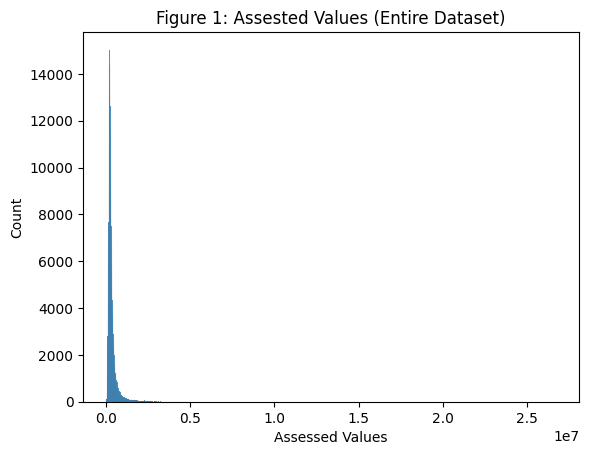

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt

y = df_house['assessed_val']
sns.histplot(y)
plt.xlabel("Assessed Values")
plt.ylabel("Count")
plt.title("Figure 1: Assested Values (Entire Dataset)")
plt.show()

In [ ]:
# Remove outliers to get a more normal price estimate
# IQR
Q1 = df_house["assessed_val"].quantile(0.25)
Q3 = df_house["assessed_val"].quantile(0.75)
IQR = Q3 - Q1

lower_iqr = Q1 - 1.5 * IQR
upper_iqr = Q3 + 1.5 * IQR
print(f"Lower IQR: {lower_iqr} | Upper IQR: {upper_iqr}")

df_house = df_house[(df_house["assessed_val"] <= upper_iqr)]

In [ ]:
# load mailing data
df_mail = load_mail_data_from_sqlite()

In [ ]:
# merge data into a new dataframe
df_merge = df_house.merge(df_mail, how="left", left_on="acct", right_on="acct")

# Drop data with missing values
df_merge.dropna(inplace=True)

In [ ]:
# Sample 10,000 rows
df_sample = df_merge.sample(n=10000, random_state=42)

In [ ]:
df_sample.describe()

In [ ]:
# filter for accounts in merge data in housing data and export
h_filter = df_house.acct.isin(df_sample.acct)
df_house = df_house[h_filter]

In [ ]:
# filter for accounts in merge data in mailing data and export
m_filter = df_mail.acct.isin(df_sample.acct)
df_mail = df_mail[m_filter]

In [ ]:
# export dataframes
output_path = "C:/Users/Blake/Documents/GitHub/C964-Capstone/Data"
df_house.to_csv(f"{output_path}/sample_housing_data.csv", index=False)
df_mail.to_csv(f"{output_path}/mailing_data.csv", index=False)

In [ ]:
df_house.describe()

In [ ]:
test_dict = {
    "date_erected": [2024],
    "im_sq_ft": [2000],
    "land_ar": [5000],
    "perimeter": [800],
    # "area*perimeter",
    "bedrooms": [3],
    "full_bath": [2],
    "half_bath": [1],
    "total_rooms": [7],
    "latitude": [-90],
    "longitude": [90],
    "dscr_e": [3],
    "frame_detached_garage": [4000],
    "gunite_pool": [0],
    "pool_heater": [0],
    "brick_garage": [0],
    "canopy_residential": [0],
    "frame_abov": [0],
    "frame_shed": [0],
    "carport_residential": [0],
    "foundation_repaired": [0],
    "cracked_slab": [0],
    "distance_miles": [haversine(30, -95, 29.760100, -95.370100)],
}